In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

593

In [6]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | peterhead
Processing Record 2 of Set 1 | barrow
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | weihe
Processing Record 6 of Set 1 | nikolskoye
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | isangel
Processing Record 9 of Set 1 | pevek
Processing Record 10 of Set 1 | new norfolk
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | canchungo
Processing Record 13 of Set 1 | nukus
Processing Record 14 of Set 1 | sorong
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | zivinice
Processing Record 17 of Set 1 | halalo
City not found. Skipping...
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | upernavik
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | cape town
Processing Record 23 of Se

City not found. Skipping...
Processing Record 36 of Set 4 | samarai
Processing Record 37 of Set 4 | whitehorse
Processing Record 38 of Set 4 | saint andrews
Processing Record 39 of Set 4 | meulaboh
Processing Record 40 of Set 4 | canico
Processing Record 41 of Set 4 | imbituba
Processing Record 42 of Set 4 | kasongo-lunda
Processing Record 43 of Set 4 | barra dos coqueiros
Processing Record 44 of Set 4 | rorvik
Processing Record 45 of Set 4 | samalaeulu
City not found. Skipping...
Processing Record 46 of Set 4 | hambantota
Processing Record 47 of Set 4 | port moresby
Processing Record 48 of Set 4 | katsuura
Processing Record 49 of Set 4 | oskaloosa
Processing Record 50 of Set 4 | barbar
City not found. Skipping...
Processing Record 1 of Set 5 | simao
Processing Record 2 of Set 5 | sept-iles
Processing Record 3 of Set 5 | asau
Processing Record 4 of Set 5 | te anau
Processing Record 5 of Set 5 | noshiro
Processing Record 6 of Set 5 | chuy
Processing Record 7 of Set 5 | ponta do sol
Proc

Processing Record 26 of Set 8 | noumea
Processing Record 27 of Set 8 | phan rang
City not found. Skipping...
Processing Record 28 of Set 8 | kudahuvadhoo
Processing Record 29 of Set 8 | ferry pass
Processing Record 30 of Set 8 | haines junction
Processing Record 31 of Set 8 | hami
Processing Record 32 of Set 8 | zig
Processing Record 33 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 34 of Set 8 | roma
Processing Record 35 of Set 8 | marcona
City not found. Skipping...
Processing Record 36 of Set 8 | sao joao da barra
Processing Record 37 of Set 8 | zastavna
Processing Record 38 of Set 8 | novo cruzeiro
Processing Record 39 of Set 8 | bambanglipuro
Processing Record 40 of Set 8 | contai
Processing Record 41 of Set 8 | skalistyy
City not found. Skipping...
Processing Record 42 of Set 8 | mitu
Processing Record 43 of Set 8 | portarlington
Processing Record 44 of Set 8 | santa cruz
Processing Record 45 of Set 8 | shihezi
Processing Record 46 of Set 8 | behshahr
Processin

Processing Record 12 of Set 12 | la crosse
Processing Record 13 of Set 12 | sobolevo
Processing Record 14 of Set 12 | sonkovo
Processing Record 15 of Set 12 | marsh harbour
Processing Record 16 of Set 12 | shingu
Processing Record 17 of Set 12 | kazanlak
Processing Record 18 of Set 12 | galiwinku
City not found. Skipping...
Processing Record 19 of Set 12 | sassandra
Processing Record 20 of Set 12 | manado
Processing Record 21 of Set 12 | tsumeb
Processing Record 22 of Set 12 | khandbari
Processing Record 23 of Set 12 | pasighat
Processing Record 24 of Set 12 | morro bay
Processing Record 25 of Set 12 | gamba
Processing Record 26 of Set 12 | portland
Processing Record 27 of Set 12 | nisporeni
Processing Record 28 of Set 12 | moberly
Processing Record 29 of Set 12 | carmen
Processing Record 30 of Set 12 | celestun
Processing Record 31 of Set 12 | puerto carreno
Processing Record 32 of Set 12 | wageningen
Processing Record 33 of Set 12 | kota bahru
Processing Record 34 of Set 12 | ariquem

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Peterhead,57.5058,-1.7981,49.10,69,95,3.22,GB,2021-10-12 19:20:00
1,Barrow,71.2906,-156.7887,30.22,86,90,25.32,US,2021-10-12 19:17:27
2,Vaini,-21.2000,-175.2000,69.96,83,20,4.61,TO,2021-10-12 19:17:24
3,Hobart,-42.8794,147.3294,47.26,79,75,3.00,AU,2021-10-12 19:17:46
4,Weihe,32.9952,105.3247,50.61,98,100,2.04,CN,2021-10-12 19:20:01
5,Nikolskoye,59.7035,30.7861,45.88,82,69,6.44,RU,2021-10-12 19:17:27
6,Port Alfred,-33.5906,26.8910,63.63,86,83,3.20,ZA,2021-10-12 19:18:52
7,Isangel,-19.5500,169.2667,73.51,83,91,3.44,VU,2021-10-12 19:20:02
8,Pevek,69.7008,170.3133,15.49,91,100,3.94,RU,2021-10-12 19:18:46
9,New Norfolk,-42.7826,147.0587,46.92,70,100,1.99,AU,2021-10-12 19:17:29


In [11]:
# new_column_order = ["column1", "column8", "column9", "column5", "column2", "column3", "column4", "column7"]
# city_data_df = city_data_df[new_column_order]

In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

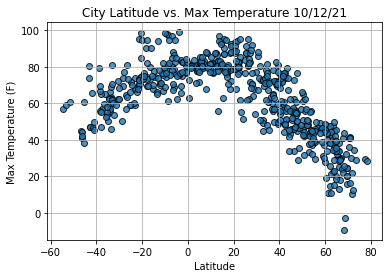

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

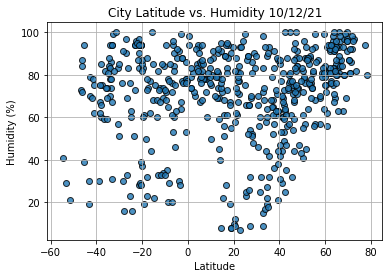

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

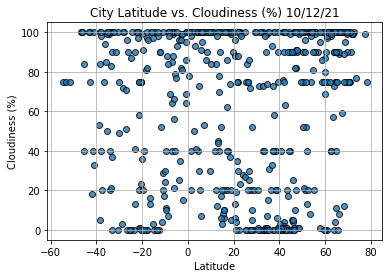

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

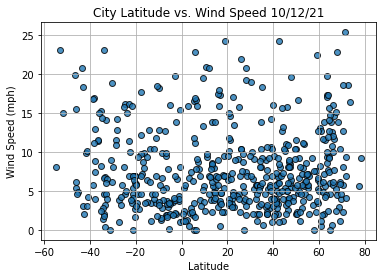

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                       Sorong
Lat                       -0.8833
Lng                        131.25
Max Temp                     81.3
Humidity                       78
Cloudiness                    100
Wind Speed                   1.05
Country                        ID
Date          2021-10-12 19:20:05
Name: 13, dtype: object

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Peterhead,57.5058,-1.7981,49.10,69,95,3.22,GB,2021-10-12 19:20:00
1,Barrow,71.2906,-156.7887,30.22,86,90,25.32,US,2021-10-12 19:17:27
4,Weihe,32.9952,105.3247,50.61,98,100,2.04,CN,2021-10-12 19:20:01
5,Nikolskoye,59.7035,30.7861,45.88,82,69,6.44,RU,2021-10-12 19:17:27
8,Pevek,69.7008,170.3133,15.49,91,100,3.94,RU,2021-10-12 19:18:46


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

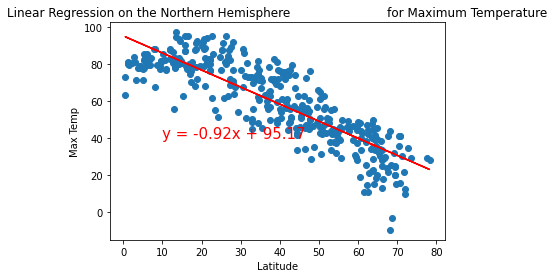

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

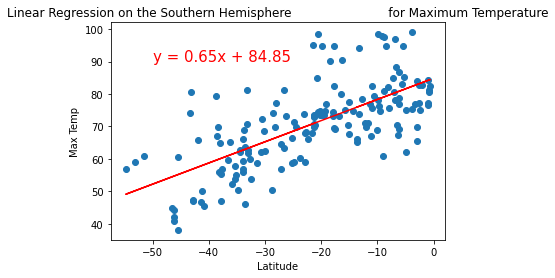

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [23]:
# # Import linregress
# from scipy.stats import linregress

# # Create a function to create perform linear regression on the weather data
# # and plot a regression line and the equation with the data.
# def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

#     # Run regression on hemisphere weather data.
#     (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

#     # Calculate the regression line "y values" from the slope and intercept.
#     regress_values = x_values * slope + intercept
#     # Get the equation of the line.
#     line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#     # Create a scatter plot and plot the regression line.
#     plt.scatter(x_values,y_values)
#     plt.plot(x_values,regress_values,"r")
#     # Annotate the text for the line equation.
#     plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
#     plt.title(title)
#     plt.xlabel('Latitude')
#     plt.ylabel(y_label)
#     plt.show()

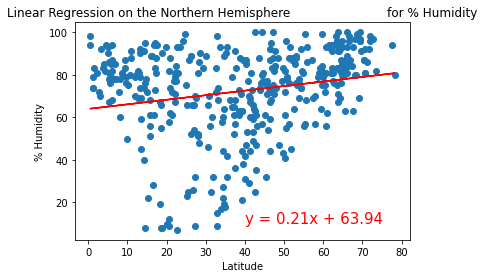

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

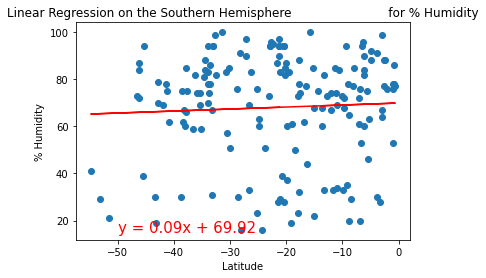

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

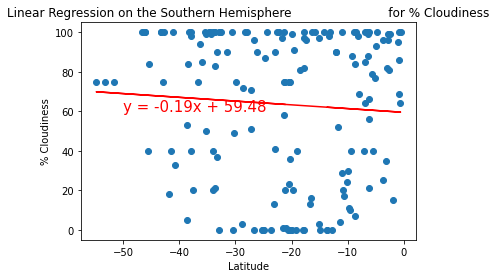

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

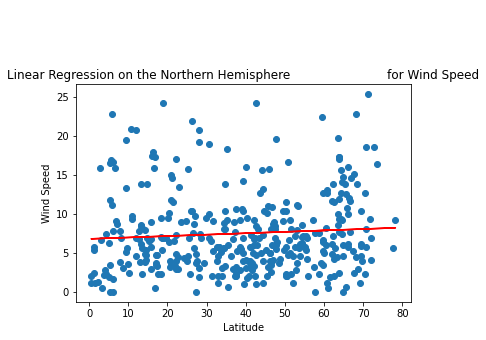

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))


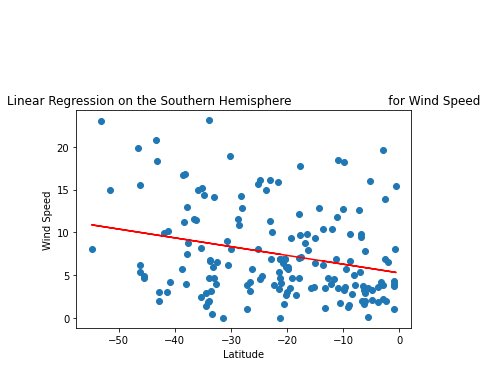

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))